# Porosity analysis, local thickness, hourglass

Continuation of the segmentation notebook.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import tifffile
import skimage.filters
import skimage.measure
import scipy
import os


In [ ]:
# Get data, if needed
if not os.path.isfile('hourglass_temp_vol.tiff'):
    !wget -q https://qim.compute.dtu.dk/data-repository/hourglass_temp.zip

    # Unzip the file to the current directory.
    import shutil
    shutil.unpack_archive('hourglass_temp.zip')

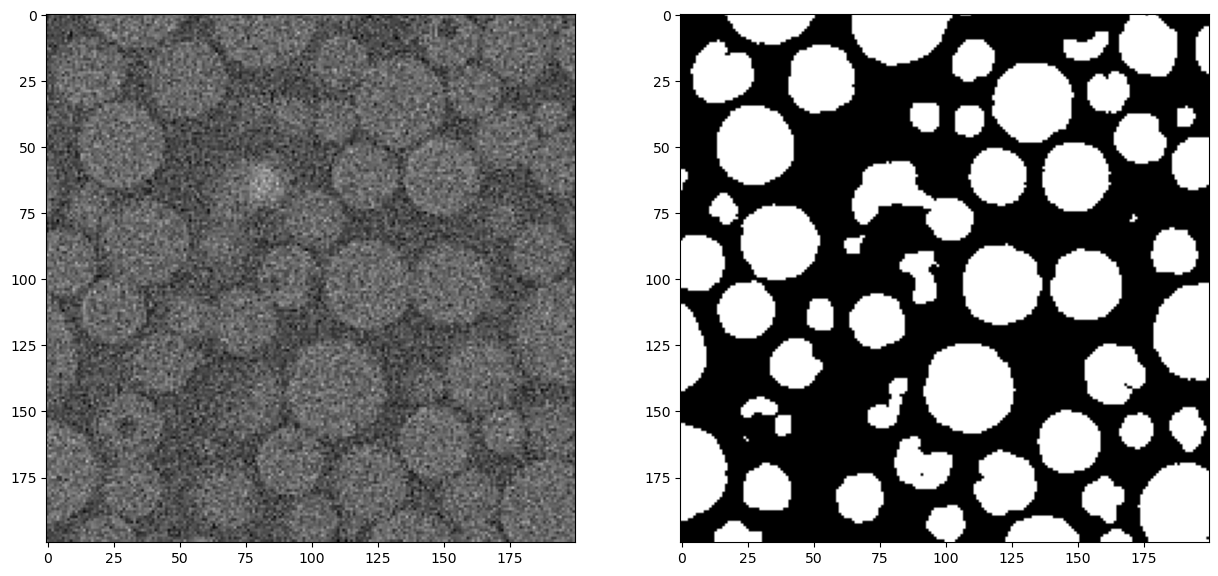

In [2]:
# Load segmentation results
vol = tifffile.imread('hourglass_temp_vol.tiff')
bin_vol = tifffile.imread('hourglass_temp_bin_vol.tiff').astype(bool)
Z, Y, X = vol.shape

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(vol[Z//2], vmin=0, vmax=255, cmap=plt.cm.gray)
ax[1].imshow(bin_vol[Z//2], cmap=plt.cm.gray)
plt.show()



In [3]:
!pip install edt
!pip install localthickness
import localthickness as lt

Bbox(x0=0.5477272727272726, y0=0.10999999999999999, x1=0.8999999999999999, y1=0.46)


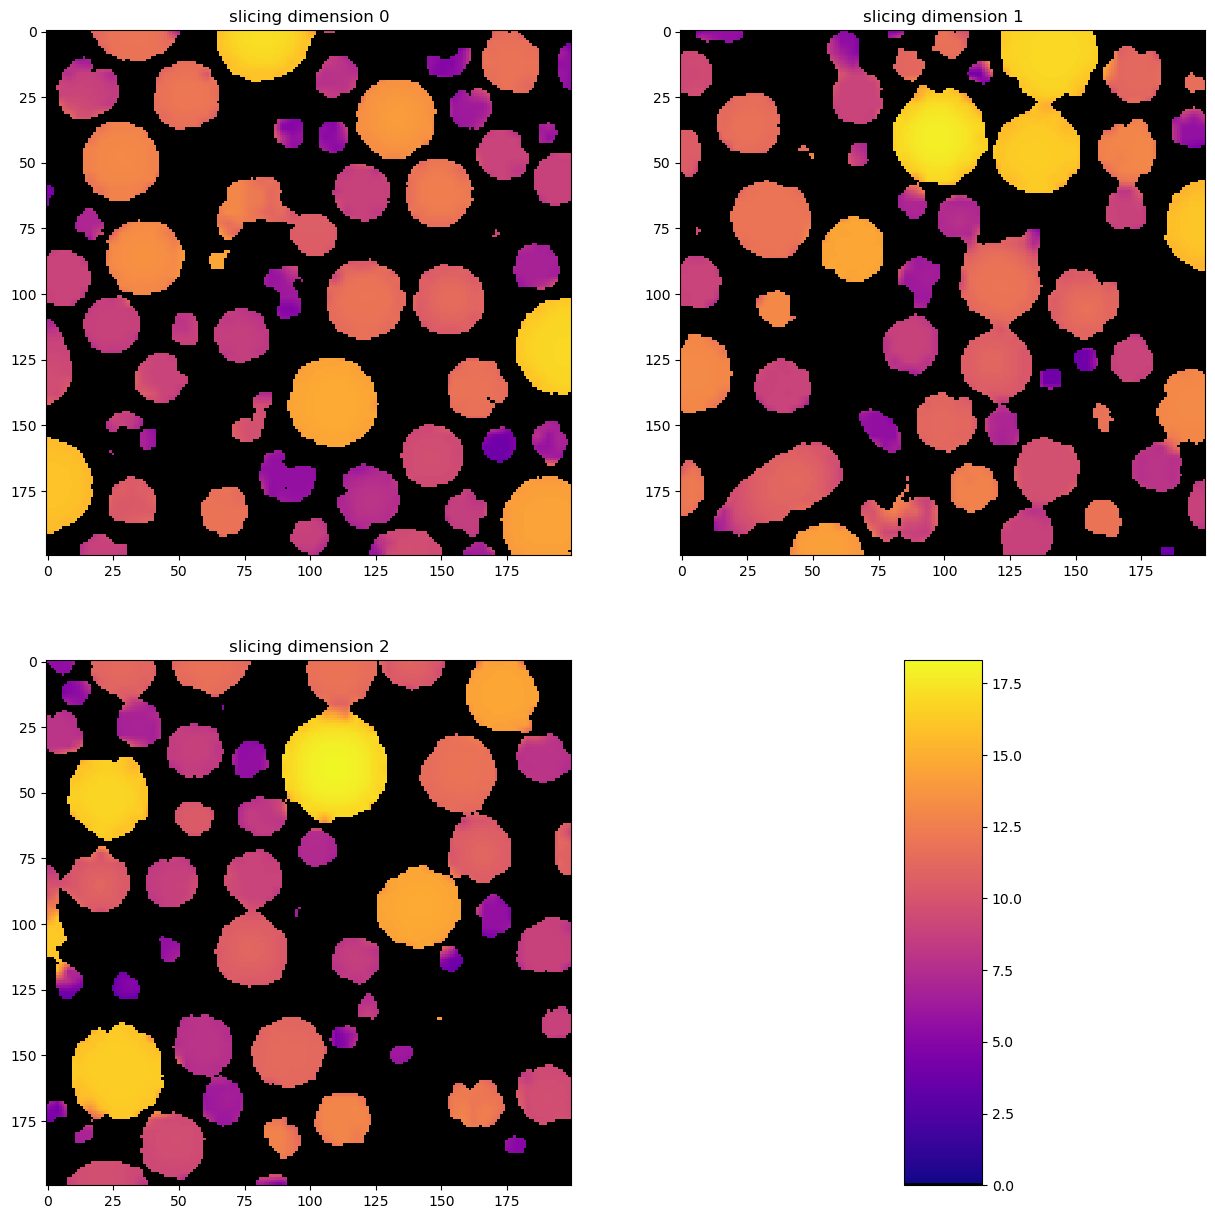

In [4]:
# Compute local thickness using scaled approach.
thickness = lt.local_thickness(bin_vol, scale=0.25)
vmax = thickness.max()

# Visualize slices of the result.
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.ravel()
ax[0].imshow(thickness[Z//2], cmap=lt.black_plasma(), vmin=0, vmax=vmax, interpolation='nearest')
ax[0].set_title('slicing dimension 0')
h1 = ax[1].imshow(thickness[:, Y//2, :], cmap=lt.black_plasma(), vmin=0, vmax=vmax, interpolation='nearest')
ax[1].set_title('slicing dimension 1')
ax[2].imshow(thickness[:, :, X//2], cmap=lt.black_plasma(), vmin=0, vmax=vmax, interpolation='nearest')
ax[2].set_title('slicing dimension 2')
pos = ax[3].get_position()
print(pos)
cax = fig.add_axes([pos.x0+0.15, pos.y0, pos.width-0.3, pos.height])
ax[3].remove()
fig.colorbar(h1, cax=cax) 
plt.show()

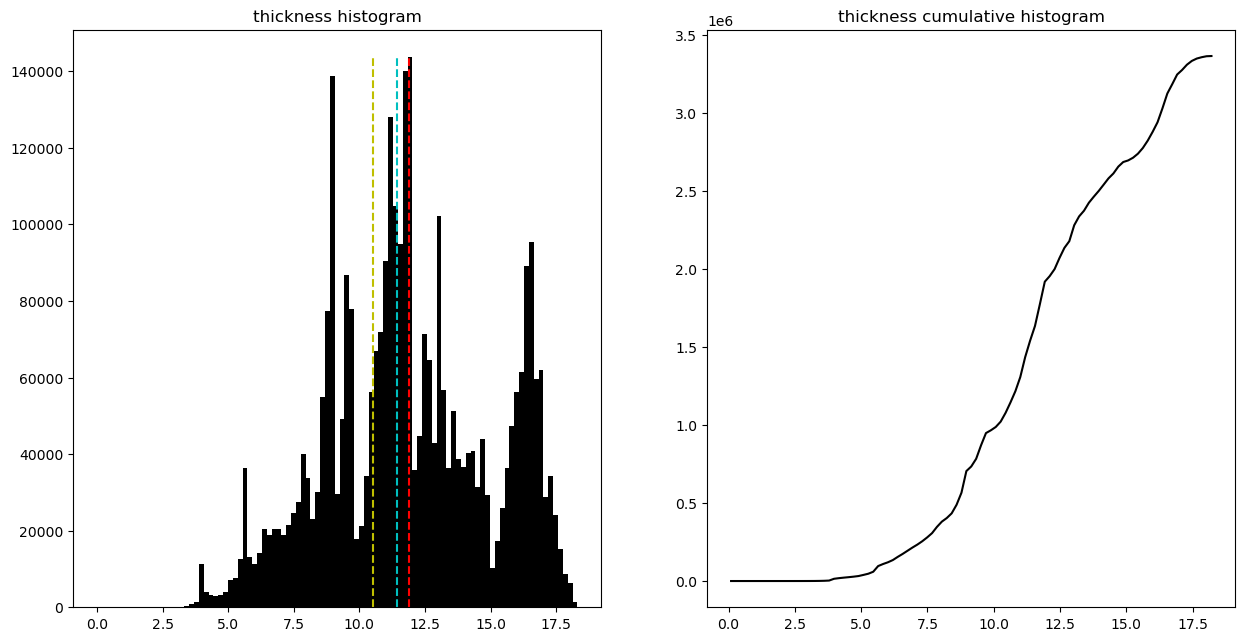

In [5]:
# Visualize the statistics.

object_thickness = thickness[thickness>0]
thickness_mean = object_thickness.mean()
logthickness = np.log(object_thickness)
thickness_median = np.exp(logthickness.mean())
thickness_mode = np.exp(logthickness.mean() - logthickness.std()**2) 

fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))


edges = np.linspace(0, vmax, 100)
centers = 0.5*(edges[:-1] + edges[1:])
hist = np.histogram(object_thickness, edges)[0]
width = centers[1] - centers[0]
ax[0].bar(centers, hist, width=width, color='k')
ax[0].set_title('thickness histogram')
ax[0].plot([thickness_mean]*2, [0, hist.max()], 'r--')
ax[0].plot([thickness_median]*2, [0, hist.max()], 'c--')
ax[0].plot([thickness_mode]*2, [0, hist.max()], 'y--')

thickness_cs = np.cumsum(hist)
ax[1].plot(centers, thickness_cs, 'k')
ax[1].set_title('thickness cumulative histogram')


plt.show()
